### Solutions for Problem Set #1

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/ps1/ps1.ipynb)

First import some of the package we will use in this exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')

In [2]:
# Read in Madison Project Database legend, so that we know which variables to use
df_legend = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx'
                          ,sheet_name='Notes',skiprows=14)
# Rename columns
df_legend.rename(columns={'Unnamed: 0':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
# Create a dictionary of var names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [3]:
# Here is my dictionary
df_legend

{'Sources': 'Sources for GDP pc and population data',
 'Full data': 'Data in a single table',
 'GDP pc': 'Real GDP per capita in 2011$',
 'Population': 'Population, mid-year (thousands)',
 'Regional data': 'Regional GDP per capita and population estimates'}

In [4]:
# The variable we will use
df_legend['GDP pc']

'Real GDP per capita in 2011$'

In [5]:
# Read in the data
df = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx',
                   sheet_name='Full data')

In [6]:
# First 5 rows of our data looks like this
df.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [7]:
# Select years 2000 and 2018 and reshape the data such that GDP pc observartions 
# from 2000 and 2018 are shown on columns
df2=df[df.year.isin([2000,2018])].pivot(index=['countrycode','country'],columns='year',values='gdppc')
df2.columns = 2000, 2018
df2.reset_index(inplace=True)

In [8]:
# Here's how the data looks like after the transformation
df2.head()

,countrycode,country,2000,2018
0,AFG,Afghanistan,502.3727,1934.5550
1,AGO,Angola,2013.6362,7771.4418
2,ALB,Albania,4808.4796,11104.1665
3,ARE,United Arab Emirates,48888.0321,76397.8181
4,ARG,Argentina,14368.9427,18556.3831


In [9]:
# Calculate cumulative and annualized growth rate from 2000 to 2018
# Express in percentages by multiplying with 100
df2['CumGrowthRate'] = (df2[2018]/df2[2000]-1)*100
df2['AnnualizedGrowth'] = ((df2[2018]/df2[2000])**(1/18)-1)*100


In [10]:
# The list of countries asked in the question
countries = ['Ethiopia','Ghana','U.R. of Tanzania: Mainland','Uganda','Burkina Faso',
            'Nigeria','Kenya','D.R. of the Congo',
            'Botswana','Malawi','Benin','Namibia',
            'Cameroon','Niger',"Côte d'Ivoire",
            'United States','Germany','United Kingdom',
            'France','Spain']

In [11]:
# Show only the countries asked in the question, sort the table by cumulative growth rate
df2[df2.country.isin(countries)].sort_values('CumGrowthRate',ascending=False).round(decimals=1)

,countrycode,country,2000,2018,CumGrowthRate,AnnualizedGrowth
156,TZA,U.R. of Tanzania: Mainland,1148.7,2875.0,150.3,5.2
111,NGA,Nigeria,2144.8,5237.7,144.2,5.1
49,ETH,Ethiopia,771.7,1838.5,138.2,4.9
29,COD,D.R. of the Congo,414.0,859.4,107.6,4.1
55,GHA,Ghana,2100.3,4267.1,103.2,4.0
21,BWA,Botswana,8044.1,15842.1,96.9,3.8
79,KEN,Kenya,1914.9,3377.5,76.4,3.2
157,UGA,Uganda,1192.0,2045.4,71.6,3.0
27,CIV,Côte d'Ivoire,2352.9,3713.6,57.8,2.6
109,NAM,Namibia,5971.8,9043.1,51.4,2.3


In [12]:
# Add population figures to the dataset df2
df2=df2.merge(df[df.year==2000][['countrycode','country','pop']],on=['countrycode','country'],how='left')

Text(0, 0.5, 'Cumulative growth, 2000-2018, %')

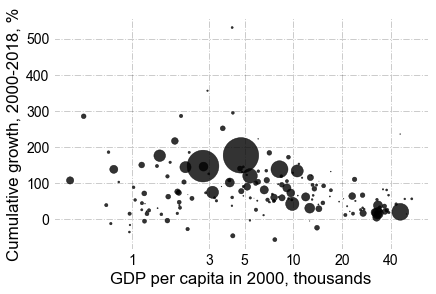

In [13]:
# Scatter plot of countries 
plt.scatter(df2[2000],df2['CumGrowthRate'],color='k',sizes=df2['pop']/1000,alpha=0.8)
plt.xscale('log')
xlabels = [1000,3000,5000,10000,20000,40000];
plt.xticks(xlabels,labels=[1,3,5,10,20,40]);
plt.xlabel('GDP per capita in 2000, thousands')
plt.ylabel('Cumulative growth, 2000-2018, %')

In [14]:
# Correlation between initial GDP pc and growth rate
df2[[2000,'CumGrowthRate']].corr().iloc[0]['CumGrowthRate']

-0.24390976923370086

**1.** Consider the Solow model with population growth. Suppose the production function is Cobb-Douglas with $\alpha=1/3$. 

**a)** Write capital stock per worker at time $t+1$ as a function of capital stock per worker at time $t$.

**b)** Suppose that investment rate is 20%, $\gamma =.2$, depreciation rate is 5%, $\delta=.05$, population growth rate is 1%, $n=.01$, and $A=1$. Find steady state capital per worker and income per worker.

**c)** Suppose that initial capital stock per worker is equal to 5, $k_0=5.8$. Simulate the economy for 100 periods, and calculate capital per worker and output per worker for each time period. Plot your results. Does the economy converge to the steady state?

**d)** Repeat part c with initial capital stock per worker equal to 6.2, $k_0=6.2$. Compare your results with part c. 



In [15]:
# Assign parameter values
T = 101
alpha = .33
gamma = .2
delta = .05
n = .01
A = 1
h = 1
# sequence of capital per worker and output per worker to be filled later.
k_seq  = np.zeros(T)
y_seq  = np.zeros(T)
# inital capital per worker
k_init = 5.8
# set the first entry of capital stock per worker equal to initial capital per worker
k_seq[0]=k_init
# similarly, for output per worker
y_seq[0]=A*k_init**alpha*h**(1-alpha)

$$\dot{k}=\gamma Ak_t^\alpha h^{1-\alpha} - (n + \delta)k$$

$$ k^{ss} = \left(\frac{A\gamma}{\delta + n} \right)^{1/(1-\alpha)} h $$

In [16]:
# calculate steady state capital per worker
k_ss = (A*gamma/(delta+n))**(1/(1-alpha))*h
# an auxiliary capital stock sequence equal to steady state capital per worker
k_sseq = np.ones(T)*k_ss
y_ss = A*k_ss**alpha*h**(1-alpha)
y_sseq = np.ones(T)*y_ss
# for a given capital per worker, first find the change in capital per worker
# add the change in capital per worker to the capital per worker at the beginning of the period
# calculate income with the new capital per worker
# loop over all time years
for t in range(1,T):
    k_dot = gamma*y_seq[t-1]-(delta+n)*k_seq[t-1]
    k_seq[t]= k_seq[t-1]+k_dot
    y_seq[t]=A*k_seq[t]**alpha*h**(1-alpha)

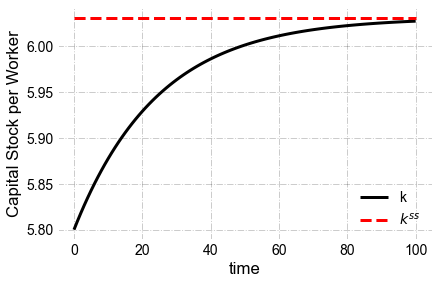

In [17]:
# plot out results
plt.plot(k_seq,'k',label='k')
plt.plot(k_sseq,'r--', label=r'$k^{ss}$')
plt.xlabel('time')
plt.ylabel('Capital Stock per Worker')
plt.legend(loc='best',frameon=False)
plt.savefig('q1_c-1.pdf')

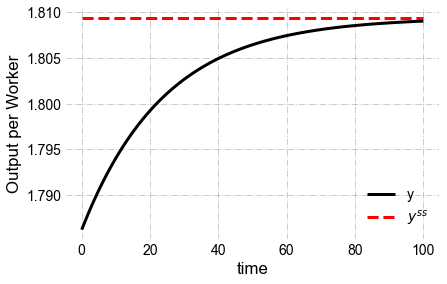

In [18]:
# plot output per worker
plt.plot(y_seq,'k',label='y')
plt.plot(y_sseq,'r--', label=r'$y^{ss}$')
plt.xlabel('time')
plt.ylabel('Output per Worker')
plt.legend(loc='best',frameon=False)
plt.savefig('q1_c-2.pdf')

In [19]:
# repeat the above analysis with a different inital value
k_seq[0]= 6.2
y_seq[0] = A*k_seq[0]**alpha*h**(1-alpha)
for t in range(1,T):
    k_dot = gamma*y_seq[t-1]-(delta+n)*k_seq[t-1]
    k_seq[t]= k_seq[t-1]+k_dot
    y_seq[t]=A*k_seq[t]**alpha*h**(1-alpha)

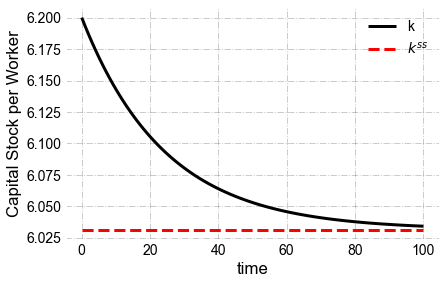

In [20]:
# plot graphs
plt.plot(k_seq,'k',label='k')
plt.plot(k_sseq,'r--', label=r'$k^{ss}$')
plt.xlabel('time')
plt.ylabel('Capital Stock per Worker')
plt.legend(loc='best',frameon=False)
plt.savefig('q1_d-1.pdf')

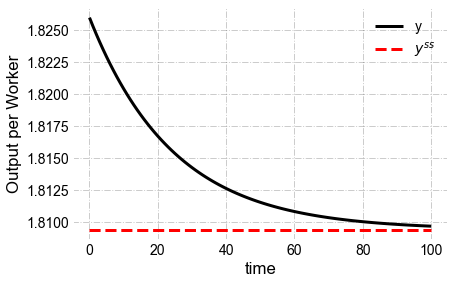

In [21]:
# plot graphs
plt.plot(y_seq,'k',label='y')
plt.plot(y_sseq,'r--', label=r'$y^{ss}$')
plt.xlabel('time')
plt.ylabel('Output per Worker')
plt.legend(loc='best',frameon=False)
plt.savefig('q1_d-2.pdf')

**2** Thanos is in a hunt to collect all six Infinity Stones in order to wipe out half of the humanity. Avengers, while fighting hard to prevent Thanos from collecting the Infinity Stones, want to know the economic implications of a potential halving of human population on Earth. Using the Solow model, starting from the steady state you found in question 1.b, calculate the capital per worker, output per worker, consumption per worker for the 100 years after the potential wipeout. Use parameter values of question 1. Plot your results. Briefly comment. Considering the assumptions of the Solow model, do you think the potential impacts of such wipeout would be more severe? If so, how? Retaining the simplicity of the Solow model, how can you reflect such destruction in the Solow model?

All you need to know about this question is that right at the time Thanos snaps his finger, population halves, and capital per worker doubles as $k = \frac{K}{L}$. Note that at the time of the event capital stock, $K$, was pre-determined and the event does not immediately impact capital stock. However, as time goes on, agents will divest some capital per worker to reach the new steady state.

![thanos](https://media.giphy.com/media/xUOxfgwY8Tvj1DY5y0/giphy.gif)

In [22]:
# the exercise is essentially the same as question 1c and 1d.
# all you need to figure out is that immediately after the event, capital per worker doubles,
# as k = K/L (halving of population will results in doubling of k)

T = 101
k_seq = np.ones(T)*k_ss
y_seq = np.ones(T)*y_ss
k_seq[0]= 2*k_ss # capital stock doubles as labor halves immediately.
y_seq[0] = A*k_seq[0]**alpha*h**(1-alpha)
# loop over time, as we did above
for t in range(T-1):
    k_dot = gamma*y_seq[t]-(delta+n)*k_seq[t]
    k_seq[t+1]= k_seq[t]+k_dot
    y_seq[t+1]=A*k_seq[t+1]**alpha*h**(1-alpha)
    if t == 49:
        k_seq[t+1] = k_seq[t+1]/2
        y_seq[t+1]=A*k_seq[t+1]**alpha*h**(1-alpha)

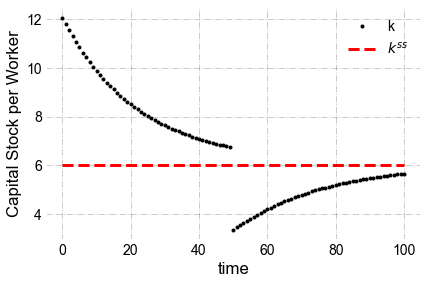

In [23]:
# plot k
plt.plot(np.arange(T),k_seq,'k.',label='k')
plt.plot(np.arange(T),np.ones(T)*k_ss,'r--', label=r'$k^{ss}$')
plt.xlabel('time')
#plt.ylim(ymin=5)
plt.ylabel('Capital Stock per Worker')
plt.legend(loc='best',frameon=False)
plt.savefig('q2-a.pdf')

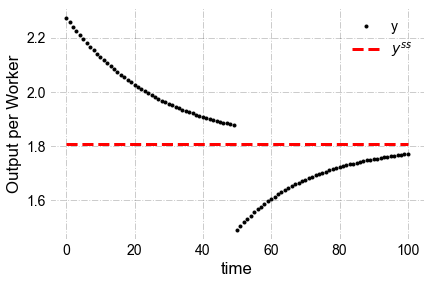

In [24]:
# plot y
plt.plot(np.arange(T),y_seq,'k.',label='y')
plt.plot(np.arange(T),np.ones(T)*y_ss,'r--', label=r'$y^{ss}$')
#plt.ylim(ymin=1.7)
plt.xlabel('time')
plt.ylabel('Output per Worker')
plt.legend(loc='best',frameon=False)
plt.savefig('q2-b.pdf')